## Task-3 performance measurements for ML models
* In this task you will measure the performance of a decision tree classifier with entropy and gini split criterions using. You should split the data into 80% for training and 20% for testing
    - Precison
    - Recall
    - Accuracy
    - F1-score
    - ROC curve plots and AUC score

In [94]:
import sklearn.datasets as datasets

import pandas as pd
import numpy as np
from itertools import cycle
seed=0
np.random.seed(seed)

iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
msk = np.random.rand(len(df)) < 0.8
y=iris.target

train_x = df[msk]
train_y = iris.target[msk]
test_x = df[~msk]
test_y = iris.target[~msk]

# Iris data sample


In [95]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
from sklearn.tree import DecisionTreeClassifier
dtree_entropy_iris = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, min_samples_leaf=4)
dtree_entropy_iris.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
dtree_gini_iris = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1)
dtree_gini_iris.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
pred_entropy = dtree_entropy_iris.predict(test_x)

In [170]:
pred_gini = dtree_gini_iris.predict(test_x)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_entropy)

0.8888888888888888

In [172]:
accuracy_score(test_y, pred_gini)

0.9259259259259259

In [173]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_gini)
cm

array([[ 8,  0,  0],
       [ 0,  5,  2],
       [ 0,  0, 12]])

In [174]:
print(sklearn.metrics.classification_report(test_y, pred_gini, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     0.714     0.833         7
           2      0.857     1.000     0.923        12

   micro avg      0.926     0.926     0.926        27
   macro avg      0.952     0.905     0.919        27
weighted avg      0.937     0.926     0.923        27



In [175]:
print(sklearn.metrics.classification_report(test_y, pred_entropy, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     0.571     0.727         7
           2      0.800     1.000     0.889        12

   micro avg      0.889     0.889     0.889        27
   macro avg      0.933     0.857     0.872        27
weighted avg      0.911     0.889     0.880        27



In [176]:
import matplotlib.pyplot as plt
probs_gini = dtree_gini_iris.predict_proba(test_x)
probs_entropy = dtree_entropy_iris.predict_proba(test_x)

In [177]:
classes = np.unique(train_y)
test_y_binarize = sklearn.preprocessing.label_binarize(test_y, classes)

In [178]:
def plotMultiClassRoc(pred_y_score):
    n_classes = 3
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(test_y_binarize[:, i], pred_y_score[:, i])
        roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = sklearn.metrics.roc_curve(test_y_binarize.ravel(), pred_y_score.ravel())
    roc_auc["micro"] = sklearn.metrics.auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = sklearn.metrics.auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

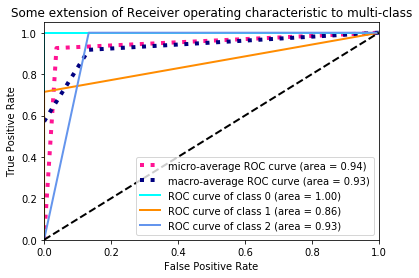

In [179]:
plotMultiClassRoc(probs_gini)

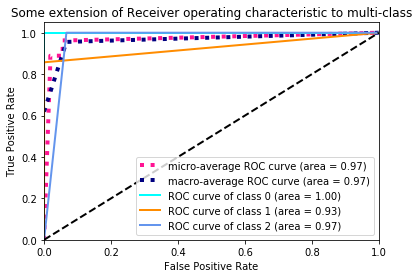

In [180]:
plotMultiClassRoc(probs_entropy)